# Описание проекта
Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.
# Описание датасета
Посмотрим на переменные, которые содержит датасет:

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике


In [1]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind
import warnings
warnings.simplefilter('ignore')
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

df = pd.read_csv('stud_math.csv')

In [2]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


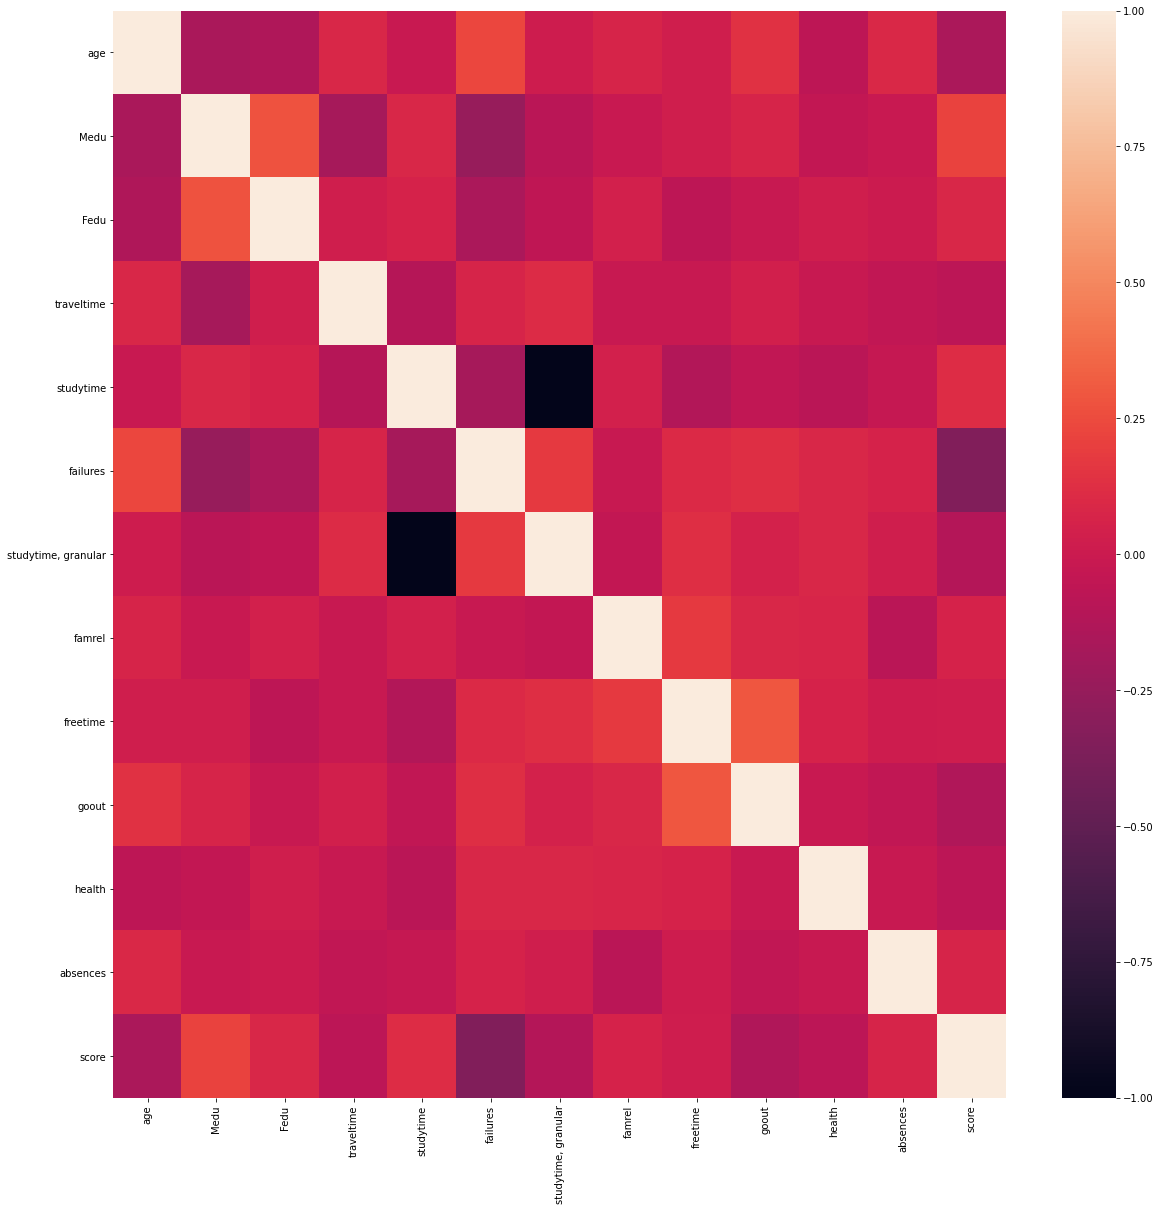

In [3]:
df_corr = df.corr()
sns.heatmap(df_corr)
plt.gcf().set_size_inches(20, 20)

In [95]:
# в описании датасета столбца studytime, granular нет, к тому же там данные дублируют studytime, необходимо удалить его
# также видно огромное кол-во столбцов с около 0 влиянием на score, нужно рассмотреть детальнее, разделив студентов
# на девушек и парней, тогда возможно влияние будет больше на каждую группу по отдельности.

In [4]:
# переименуем столбцы начинающиеся с большой буквы на маленькую для удобства
# а также сложные названия в простые
df.rename(columns={'Pstatus': 'p_status', 'Medu': 'm_edu', 'Fedu': 'f_edu',
                   'Mjob': 'm_job', 'Fjob': 'f_job', 'studytime, granular': 'studytime_gr'}, inplace=True)

In [5]:
# как видно, около половины данных представленные в буквенном виде бинарные. заменим цифрами

In [6]:
replacement_list = []
list_of_binary_columns = ['sex', 'address', 'famsize', 'p_status',
                          'schoolsup', 'famsup', 'paid', 'activities',
                          'nursery', 'higher', 'internet', 'romantic']

In [7]:
for elem in list_of_binary_columns:
    a = df[elem].unique()
    a = a[~pd.isnull(a)]
    if len(a) == 2:
        replacement_list.append([a[0], a[1]])
    else:
        print(
            f"со столбцом {elem} произошла ошибка. Уникальные значения: stud[elem].values")
replacement_list

[['F', 'M'],
 ['U', 'R'],
 ['GT3', 'LE3'],
 ['A', 'T'],
 ['yes', 'no'],
 ['no', 'yes'],
 ['no', 'yes'],
 ['no', 'yes'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['no', 'yes']]

In [8]:
# заменяем
for i in range(len(list_of_binary_columns)):
    elem = list_of_binary_columns[i]
    df.loc[df[elem] == replacement_list[i][0], elem] = 1.0
    df.loc[df[elem] == replacement_list[i][1], elem] = 0.0

In [9]:
# проверяем
replacement_list = []
for elem in list_of_binary_columns:
    a = df[elem].unique()
    a = a[~pd.isnull(a)]
    if len(a) == 2:
        replacement_list.append([a[0], a[1]])
replacement_list

[[1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0]]

In [10]:
# продолжаем анализ
df[list_of_binary_columns].describe()

,sex,address,famsize,p_status,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395.0,378.0,368.0,350.0,386.0,356.0,355.0,381.0,379.0,375.0,361.0,364.0
unique,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
top,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
freq,208.0,295.0,261.0,314.0,335.0,219.0,200.0,195.0,300.0,356.0,305.0,240.0


In [11]:
temp = df[list_of_binary_columns].describe()

In [12]:
# посчитали пустые строки
395-temp.T['count']

sex            0.0
address       17.0
famsize       27.0
p_status      45.0
schoolsup      9.0
famsup        39.0
paid          40.0
activities    14.0
nursery       16.0
higher        20.0
internet      34.0
romantic      31.0
Name: count, dtype: float64

In [13]:
df

,school,sex,age,address,famsize,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_gr,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,1,18,1,NaN,1,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,1,1,1,1,1,-6.0,1,NaN,1,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,1,17,1,1,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,0,0,1,1,0,-6.0,1,1,1,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,1,15,1,0,0,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,1,1,NaN,1,1,-6.0,1,1,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,1,15,1,1,0,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,0,0,0,0,1,-9.0,1,1,0,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,1,16,1,1,0,3.0,3.0,other,other,home,father,1.0,2.0,0.0,0,0,0,1,1,-6.0,1,0,1,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,0,20,1,0,1,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,0,0,0,1,1,-6.0,1,0,1,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,0,17,1,0,0,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,0,1,1,1,0,-3.0,1,1,1,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,0,21,0,1,0,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,1,1,1,0,-3.0,NaN,0,1,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,0,18,0,0,0,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,0,1,1,NaN,0,-3.0,1,1,1,4.0,4.0,1.0,5.0,0.0,50.0


In [14]:
df.pivot_table(['address', 'famsize', 'p_status', 'famsup', 'paid', 'activities',
                'nursery', 'higher', 'internet', 'romantic'], 'sex', aggfunc=['count'])

count                                                               \
    activities address famsize famsup higher internet nursery p_status paid   
sex                                                                           
0.0        179     178     171    174    172      167     179      166  166   
1.0        202     200     197    182    203      194     200      184  189   

              
    romantic  
sex           
0.0      169  
1.0      195

In [15]:
df.score.value_counts()

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

In [16]:
# можно по разному интерпретировать такое большое кол-во учеников с оценкой 0, как видно минимальный шаг оценки-5
# крайне маловероятно что никто из 37 людей не смог набрать даже 5 баллов
# я буду считать что они просто не пришли на экзамен/не были допущены, всех их удалю из датасета

In [17]:
df.romantic.value_counts()

1.0    240
0.0    124
Name: romantic, dtype: int64

In [18]:
# около 30 строк имеют значение romantic NaN, что составляет менее 10% от всей выборки, считаю что этим можно пренебречь
# итоговая погрешность не сильно увеличится, если проанализировать результаты без NaN, будем считать что NaN равномерно
# распределены между no и yes

In [19]:
df.schoolsup.value_counts()

0.0    335
1.0     51
Name: schoolsup, dtype: int64

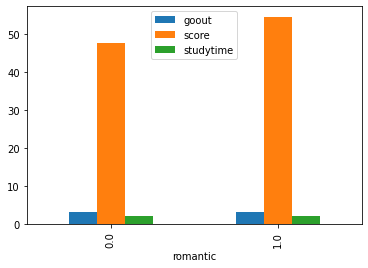

In [20]:
df.pivot_table(values=['studytime', 'score', 'goout', 'schoolsup'],
               index='romantic',
               aggfunc='mean').plot(kind='bar')

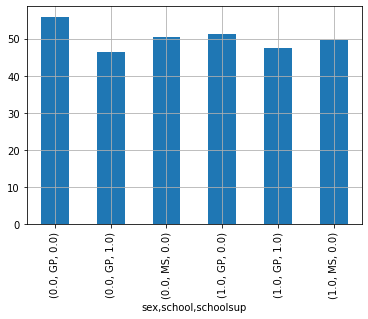

In [21]:
df.groupby(by=['sex', 'school', 'schoolsup'])[
    'score'].mean().plot(kind='bar', grid=True)

In [22]:
# при доп. образовательной поддержки оценки у учеников хуже, чем без неё
# крайне маловероятно что доп учеба отнимает баллы, скорее всего оценка была бы ещё хуже без доп учебы
# считаю нужным удалить этот столбец, т.к. никакой полезной информации он не несет

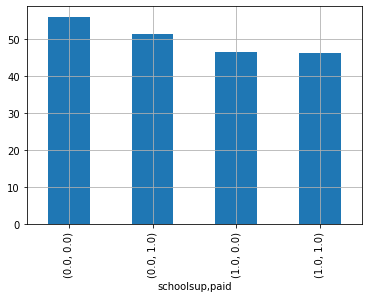

In [23]:
df.groupby(by=['schoolsup', 'paid'])[
    'score'].mean().plot(kind='bar', grid=True)

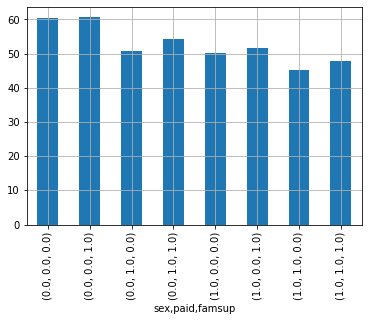

In [24]:
df.groupby(by=['sex', 'paid', 'famsup'])[
    'score'].mean().plot(kind='bar', grid=True)

In [25]:
# опять не очевидный вывод, famsup и paid положительно не влияет на учеников

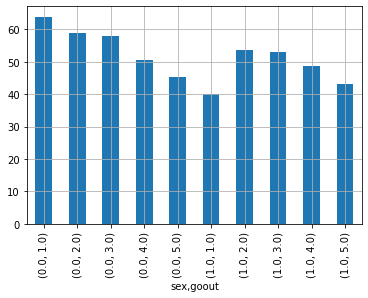

In [26]:
df.groupby(by=['sex', 'goout'])['score'].mean().plot(kind='bar', grid=True)

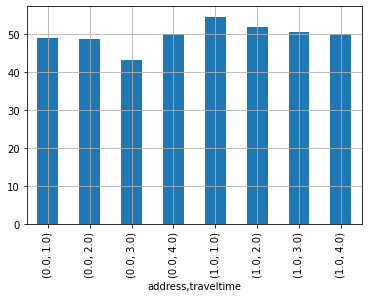

In [27]:
df.groupby(by=['address', 'traveltime'])[
    'score'].mean().plot(kind='bar', grid=True)

In [28]:
# отличная зависимость между проживанием и временем до учебы

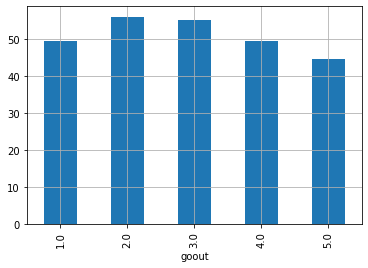

In [29]:
df.groupby(by=['goout'])['score'].mean().plot(kind='bar', grid=True)

In [30]:
# замечательная зависимость между вренем проведенным с друзьями и оценкой, вне зависимости от пола отклонение одинаковое

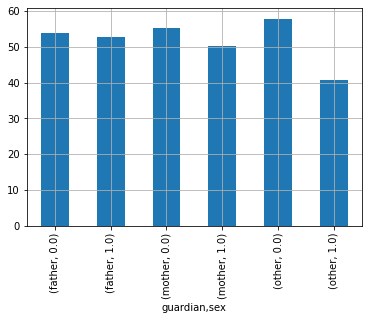

In [31]:
df.groupby(by=['guardian', 'sex'])['score'].mean().plot(kind='bar', grid=True)

In [32]:
# дети с гендерно небинарными родителями учаться несколько хуже, в остальном разницы нет
# считаю нужным удалить данный столбец, т.к. решительно осуждаю притеснение по гендерному признаку
# должно быть данные подделали

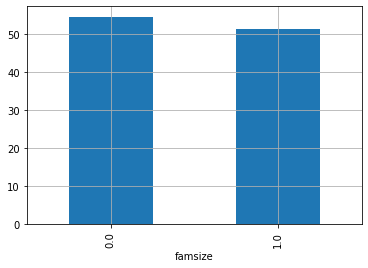

In [33]:
df.groupby(by=['famsize'])['score'].mean().plot(kind='bar', grid=True)

In [34]:
# разница около 1 балла, можно считать это погрешностью, удаляю столбец

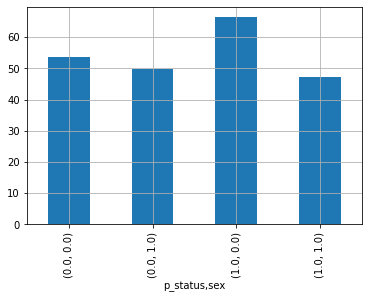

In [35]:
df.groupby(by=['p_status', 'sex'])['score'].mean().plot(kind='bar', grid=True)

In [36]:
# разница весьма ощутима

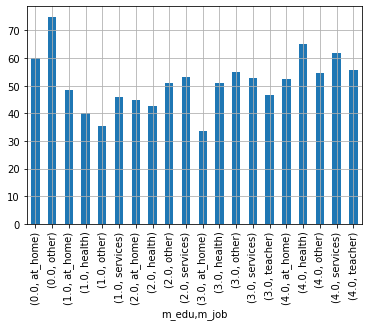

In [37]:
df.groupby(by=['m_edu', 'm_job'])['score'].mean().plot(kind='bar', grid=True)

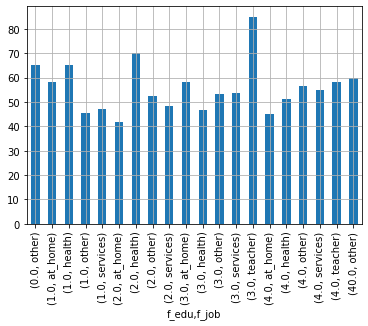

In [38]:
df.groupby(by=['f_edu', 'f_job'])['score'].mean().plot(kind='bar', grid=True)

In [39]:
# разница также есть, но несколько не очевидна. если образования нет у родителя-дети учатся значительно лучше большинства других

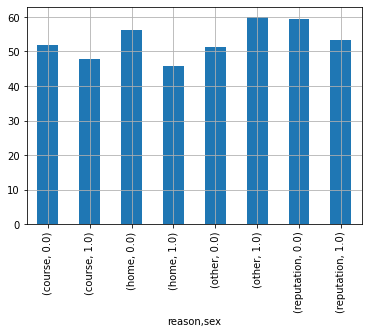

In [40]:
df.groupby(by=['reason', 'sex'])['score'].mean().plot(kind='bar', grid=True)

In [41]:
# репутация школы и близость к дому лучше всего влияет на оценку

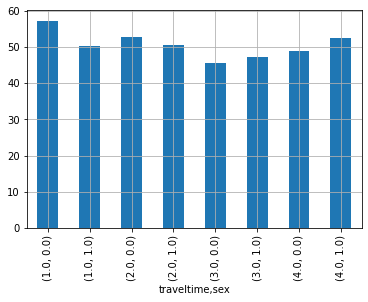

In [42]:
df.groupby(by=['traveltime', 'sex'])[
    'score'].mean().plot(kind='bar', grid=True)

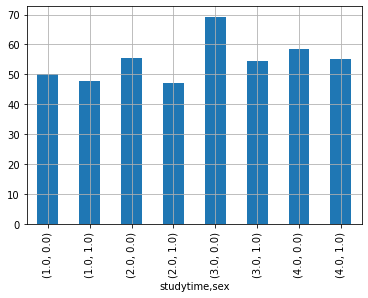

In [43]:
df.groupby(by=['studytime', 'sex'])['score'].mean().plot(kind='bar', grid=True)

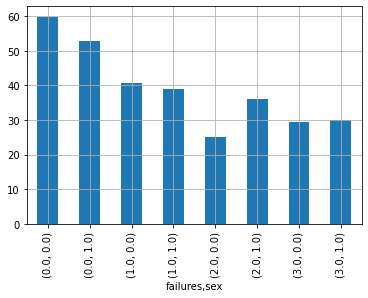

In [44]:
df.groupby(by=['failures', 'sex'])['score'].mean().plot(kind='bar', grid=True)

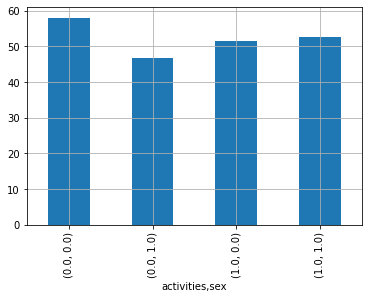

In [45]:
df.groupby(by=['activities', 'sex'])[
    'score'].mean().plot(kind='bar', grid=True)

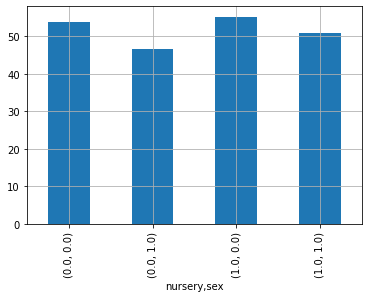

In [46]:
df.groupby(by=['nursery', 'sex'])['score'].mean().plot(kind='bar', grid=True)

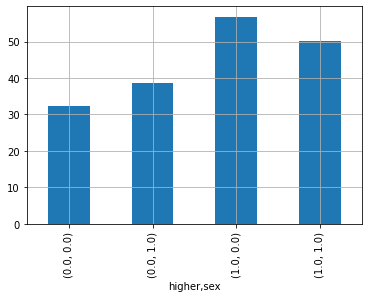

In [47]:
df.groupby(by=['higher', 'sex'])['score'].mean().plot(kind='bar', grid=True)

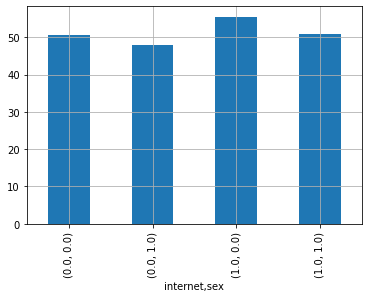

In [48]:
df.groupby(by=['internet', 'sex'])['score'].mean().plot(kind='bar', grid=True)

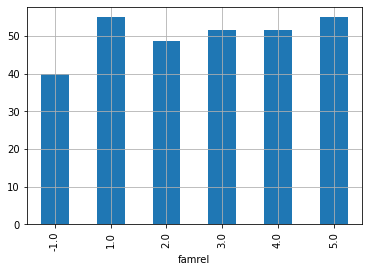

In [49]:
df.groupby(by=['famrel'])['score'].mean().plot(kind='bar', grid=True)

In [50]:
df.famrel.value_counts()

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

In [51]:
# -1 странное значение, быть может опечатка и должно быть 1, либо выброс. учитывая то, что всего значений с 1 7
# предпочту удалить, т.к. составляет более 10% выборки с 1, слишком сильно повлияет

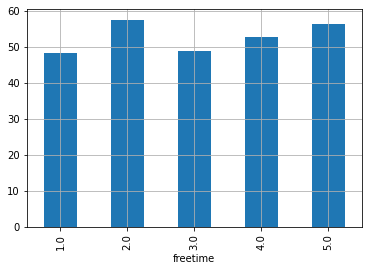

In [52]:
df.groupby(by=['freetime'])['score'].mean().plot(kind='bar', grid=True)

In [53]:
df.freetime.value_counts()

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

In [54]:
# странный результат

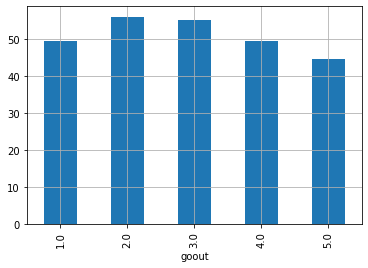

In [55]:
df.groupby(by=['goout'])['score'].mean().plot(kind='bar', grid=True)

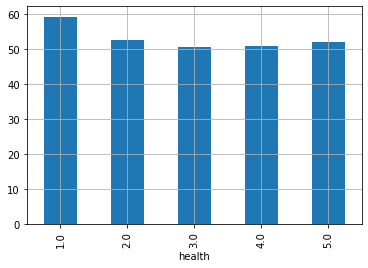

In [56]:
df.groupby(by=['health'])['score'].mean().plot(kind='bar', grid=True)

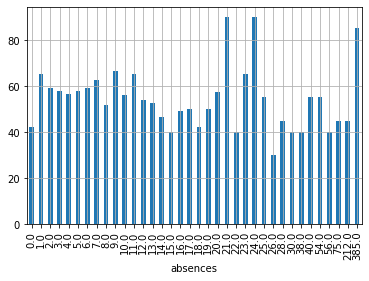

In [57]:
df.groupby(by=['absences'])['score'].mean().plot(kind='bar', grid=True)

In [58]:
df.absences.value_counts()

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

In [59]:
# 212 и 385 похоже на выброс,удаляю их

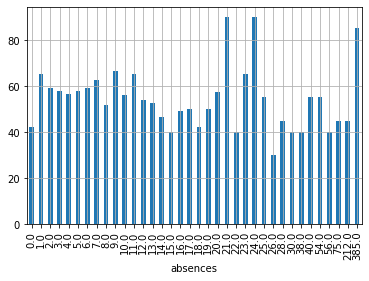

In [60]:
df.groupby(by=['absences'])['score'].mean().plot(kind='bar', grid=True)

In [61]:
# очищаю датасет

In [62]:
df = df.loc[df.score > 0]

In [63]:
del df['famsup']

In [64]:
# в описании датасета данного столбца нет, а также там присутствует корреляция 1 с studtime
del df['studytime_gr']

In [65]:
del df['schoolsup']

In [66]:
del df['paid']

In [67]:
del df['guardian']

In [68]:
del df['famsize']

In [69]:
df = df.loc[df.famrel > 0]

In [70]:
df = df.loc[df.absences < 100]

In [71]:
stud = df
stud

,school,sex,age,address,p_status,m_edu,f_edu,m_job,f_job,reason,traveltime,studytime,failures,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,1,18,1,1,4.0,4.0,at_home,teacher,course,2.0,2.0,0.0,1,1,1,NaN,1,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,1,17,1,NaN,1.0,1.0,at_home,other,course,1.0,2.0,0.0,1,0,1,1,1,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,1,15,1,0,1.0,1.0,at_home,other,other,1.0,2.0,3.0,1,1,1,1,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,1,15,1,0,4.0,2.0,health,NaN,home,1.0,3.0,0.0,0,1,1,1,0,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,1,16,1,0,3.0,3.0,other,other,home,1.0,2.0,0.0,1,1,1,0,1,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,MS,1,18,1,0,3.0,1.0,teacher,services,course,1.0,2.0,0.0,1,1,1,1,1,4.0,3.0,4.0,1.0,0.0,40.0
391,MS,0,17,1,0,3.0,1.0,services,services,course,2.0,1.0,0.0,1,0,1,1,1,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,0,21,0,0,1.0,1.0,other,other,course,1.0,1.0,3.0,1,0,NaN,0,1,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,0,18,0,0,3.0,2.0,services,other,course,3.0,1.0,0.0,NaN,0,1,1,1,4.0,4.0,1.0,5.0,0.0,50.0


In [72]:
# удалил 80 строк и 6 столбцов. все оставшиеся данные так или иначе влияют на score

In [73]:
# сейчас необходимо понять, на какие данные нужно обратить внимание
# из предварительно анализа больше всего влияло на положительный исход экзамена:профессия родителя
# образование родителя, время с друзьями, пол ученика, желание получить высшее образование

In [74]:
stud_num = df[['age', 'absences', 'score']]

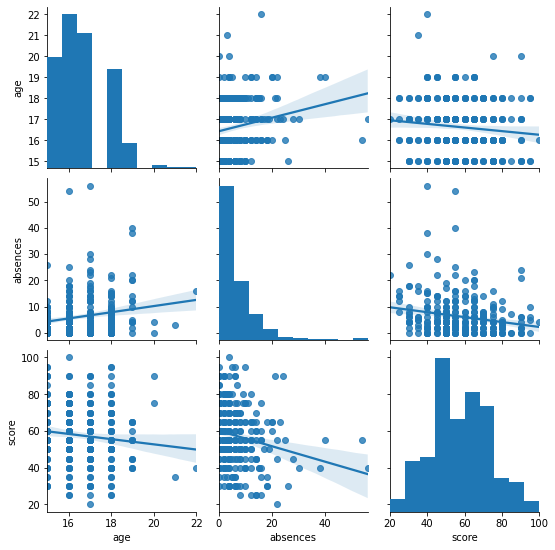

In [75]:
sns.pairplot(stud_num, kind='reg')

In [76]:
stud_num.corr()

,age,absences,score
age,1.000000,0.19494,-0.110525
absences,0.194940,1.00000,-0.198610
score,-0.110525,-0.19861,1.000000


In [77]:
list_of_binary_columns

['sex',
 'address',
 'famsize',
 'p_status',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [78]:
# весь столбец famsize я ранее удалил, нужно поправить словарь
del list_of_binary_columns[2]

In [79]:
# удаляю остальные лишние
del list_of_binary_columns[3:6]

In [80]:
# весь нужный список готов
list_of_binary_columns

['sex',
 'address',
 'p_status',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [81]:
# для удобства составим списки этих критериев
# бинарный мы уже сделали выше list_of_binary_columns но нужно добавить к нему school
list_of_binary_columns.append('school')
list_of_rating_columns = ('m_edu', 'f_edu', 'm_job', 'f_job',
                          'reason', 'traveltime', 'studytime',
                          'failures', 'famrel', 'freetime', 'goout', 'health')
list_of_all_columns = []
list_of_all_columns.extend(list_of_binary_columns)
list_of_all_columns.extend(list_of_rating_columns)

In [82]:
# функция для бинарных
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(10, 3))
    sns.boxplot(x=column, y='score',
                data=stud.loc[stud.loc[:, column].isin(
                    stud.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

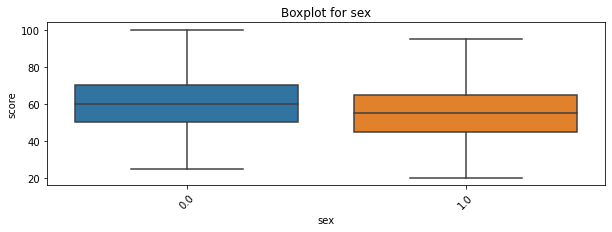

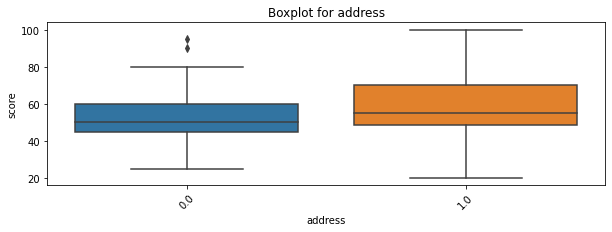

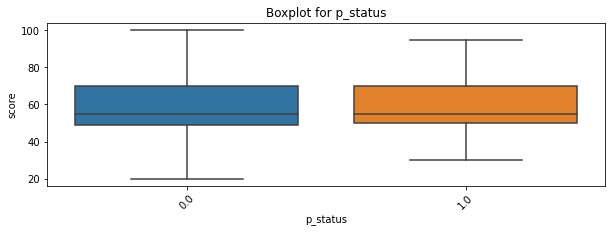

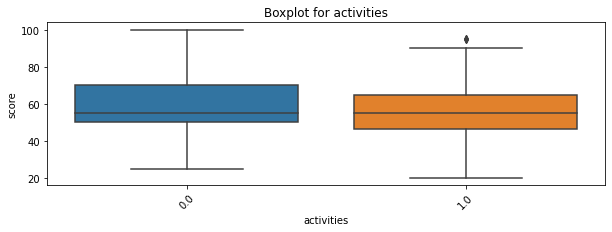

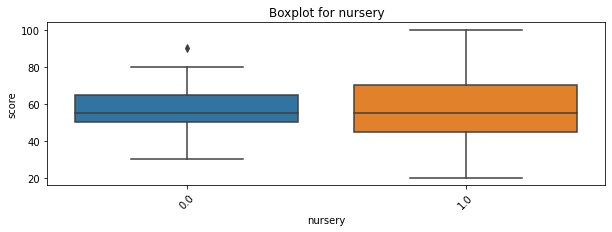

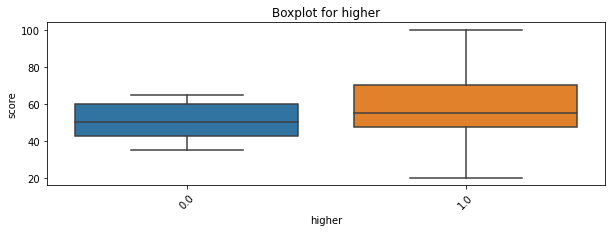

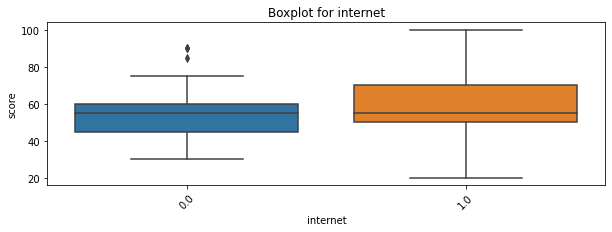

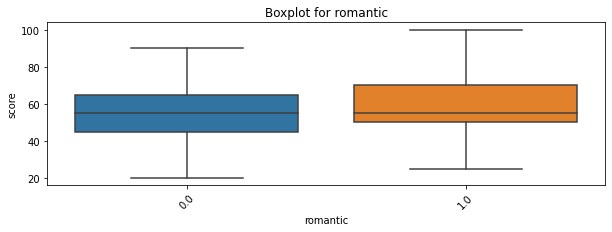

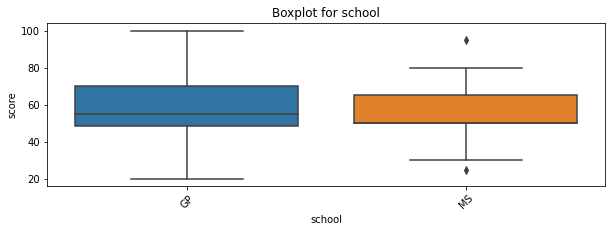

In [83]:
for col in list_of_binary_columns:
    get_boxplot(col)

In [84]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(11, 4))
    sns.boxplot(x=column, y='score',
                data=stud.loc[stud.loc[:, column].isin(
                    stud.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

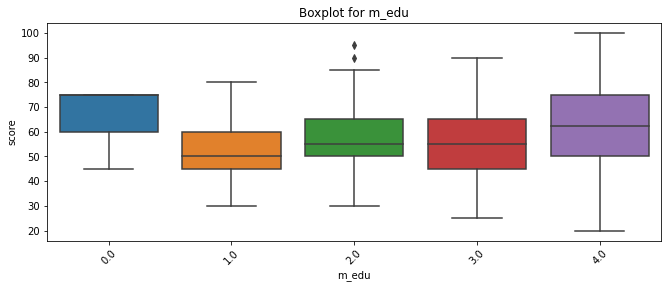

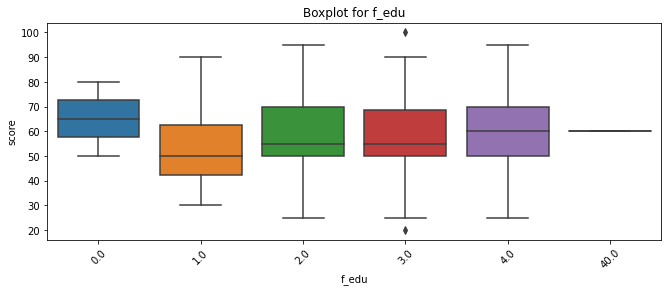

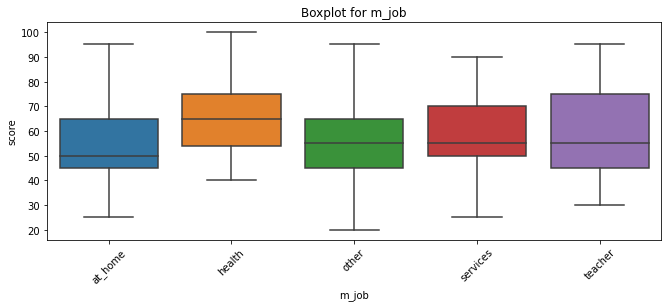

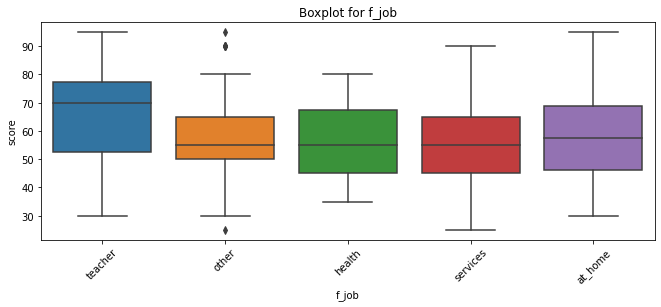

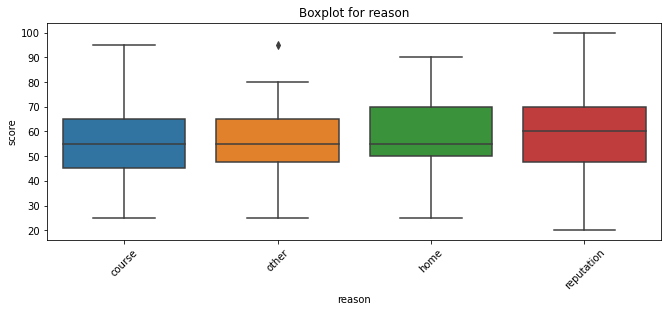

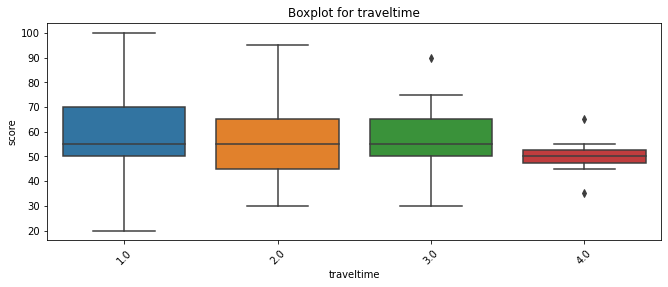

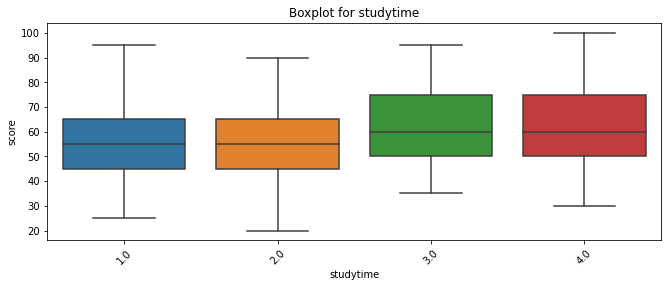

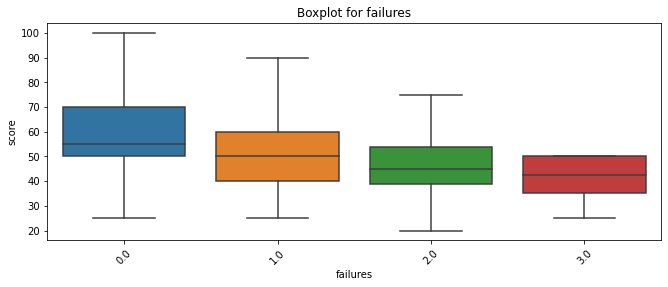

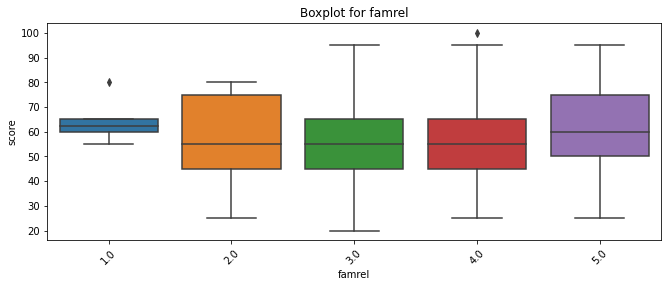

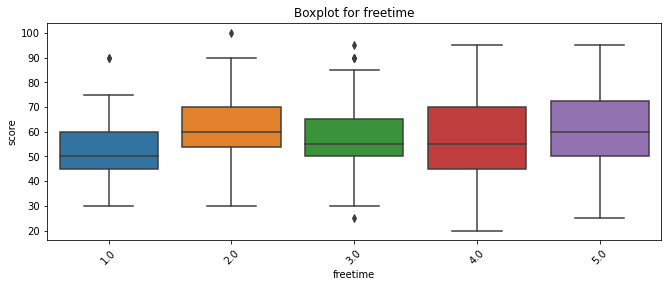

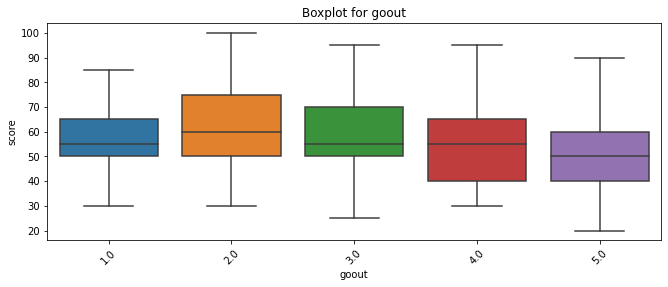

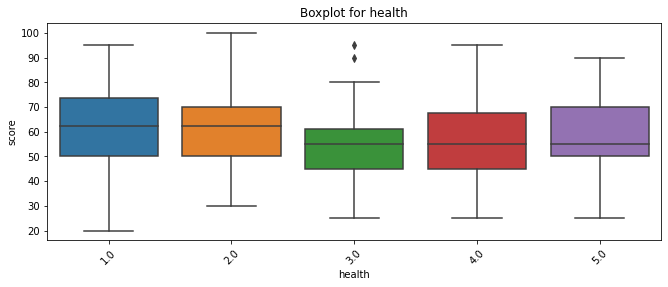

In [85]:
# сначала сделаем box plot на бинарных
for col in list_of_rating_columns:
    get_boxplot(col)

In [86]:
# вновь любопытное наблюдение, девушки в среднем тратят значительно больше времени на учебу чем парни
# однако оценки в среднем у них на 5 баллов меньше
# скорее всего математика не является основным для них предметов и время затраченное на учебу в датасете-общее
# (т.е. по всем предметам)

In [87]:
# проанализировав весь файл, понял что заполнить пустые строки другими значениями не представляется возможным
# также можно было бы заменить все не числовые значения числовыми, если бы предстояла дальнейшая работа с файлом
# это действие значительно упростило бы работу

In [88]:
# на протяжении всей работы над проектом я делил учеников на 3 категории- парни, девушки, все вместе
# т.к. было замечено, что разные критерии оказывают не одинаковое влияние на учеников
# не вижу смысла собирать их в 1 кучу и делать вывод на общей массе учеников, это сильно усреднит их

In [89]:
pd.DataFrame(stud.corr().iloc[-1, :-1])

,score
age,-0.110525
m_edu,0.166750
f_edu,0.065347
traveltime,-0.082325
studytime,0.142131
failures,-0.263812
famrel,0.056351
freetime,-0.020468
goout,-0.184857
health,-0.045680


In [90]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(12, 4))
    sns.boxplot(x=column, y='score',
                data=stud.loc[stud.loc[:, column].isin(
                    stud.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

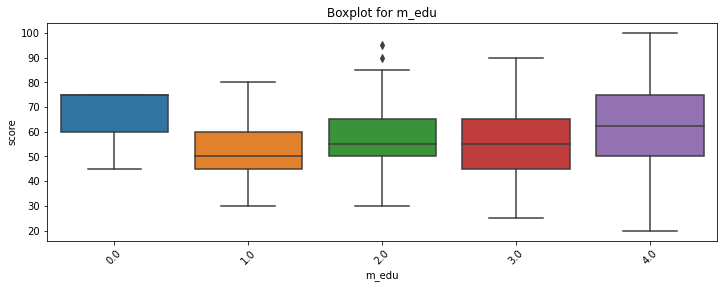

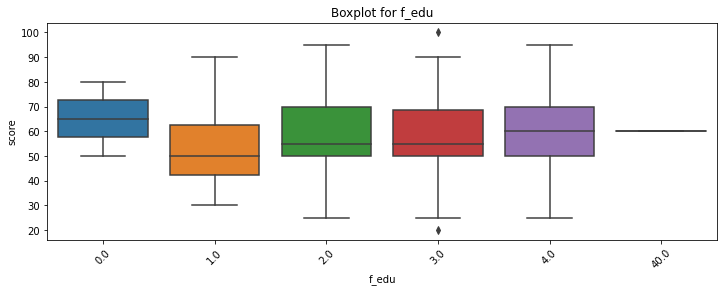

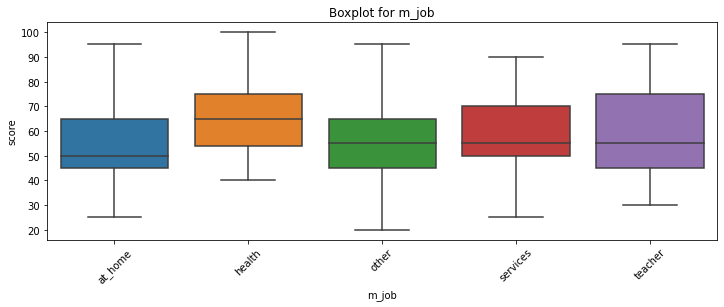

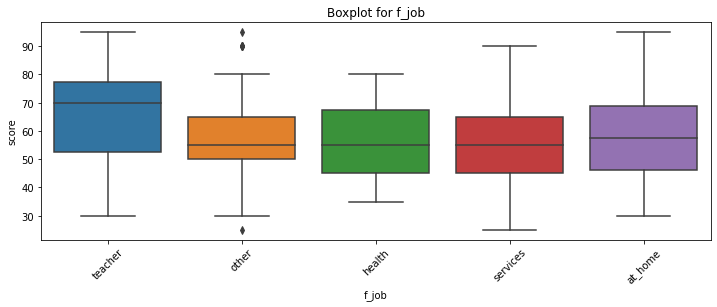

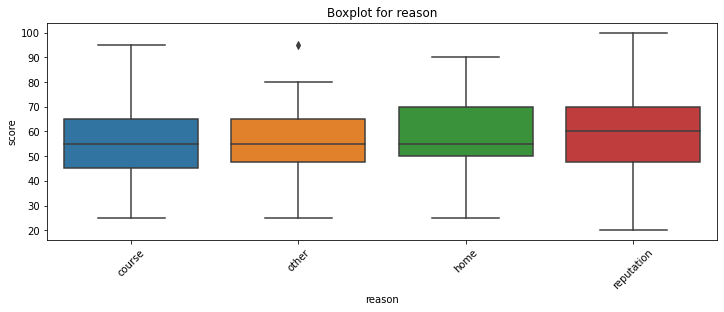

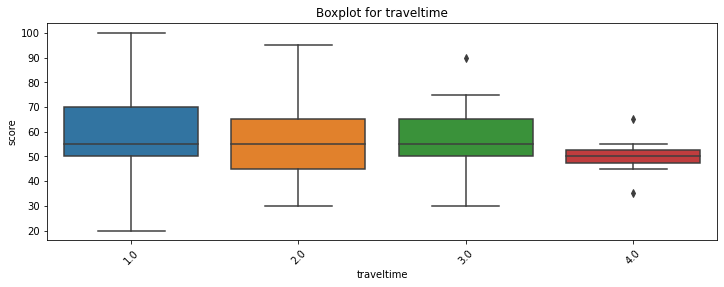

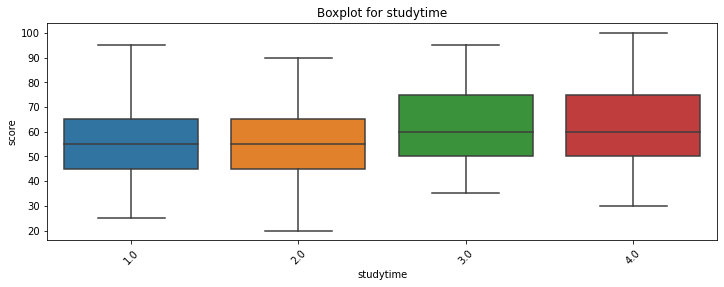

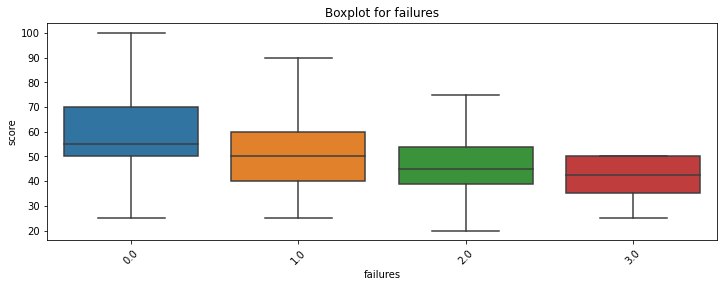

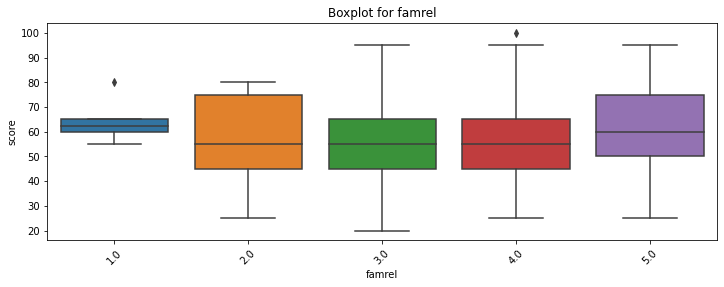

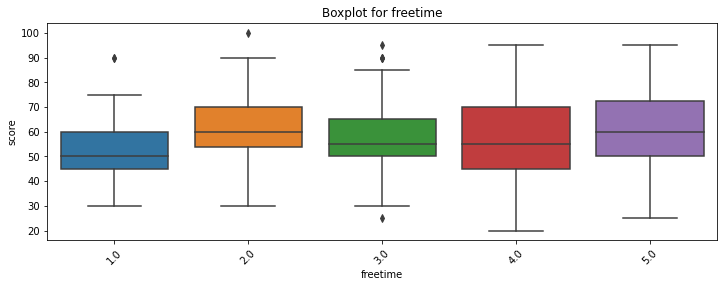

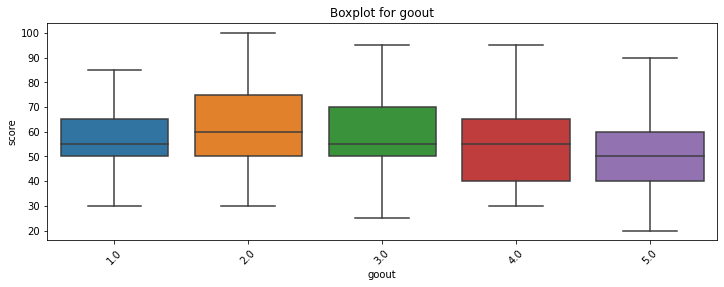

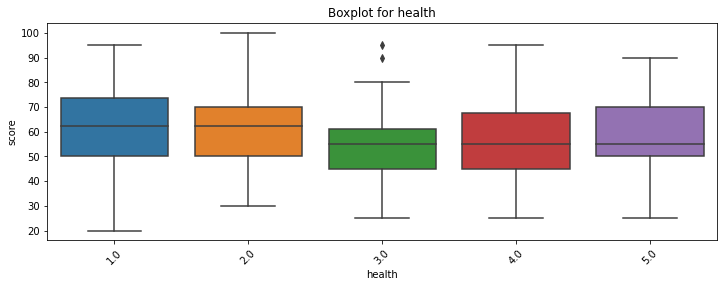

In [91]:
for col in list_of_rating_columns:
    get_boxplot(col)

In [92]:
pd.DataFrame(stud.corr().iloc[-1, :-1])

,score
age,-0.110525
m_edu,0.166750
f_edu,0.065347
traveltime,-0.082325
studytime,0.142131
failures,-0.263812
famrel,0.056351
freetime,-0.020468
goout,-0.184857
health,-0.045680


 Cейчас наглядно видно, как сильно отличаются ученики
 Gройдемся по тем пунктам, вклад которых наибольший на учеников(M-парни, F-девушки)
 age: M-отрицательная корреляция. F-положительная, но весьма слабая
 Medu: M-определяющий пункт с наибольшей положительной корреляцией, F-положительная
 Fedu: M-сильная положительная , F-положительная, но весьма слабая
 следует добавить, что если отец учитель-это значительно увеличивает успеваемость любых учеников
 но в особенности мальчиков(для более узкой части учеников этот пункт окажет большее влияение)
 traveltime: M-сильная отрицательная , F-положительная, но весьма слабая
 studytime:  M-сильная положительная, F-определяющий пункт с наибольшей положительной
 failures: M-определяющий пункт с наибольшей отрицательной , F-определяющий пункт с наибольшей отрицательной
 goout: M-сильная отрицательная , F-отрицательная
 health: M-слабая отрицательная , F-отрицательная
 absences: M-слабая отрицательная , F-отрицательная

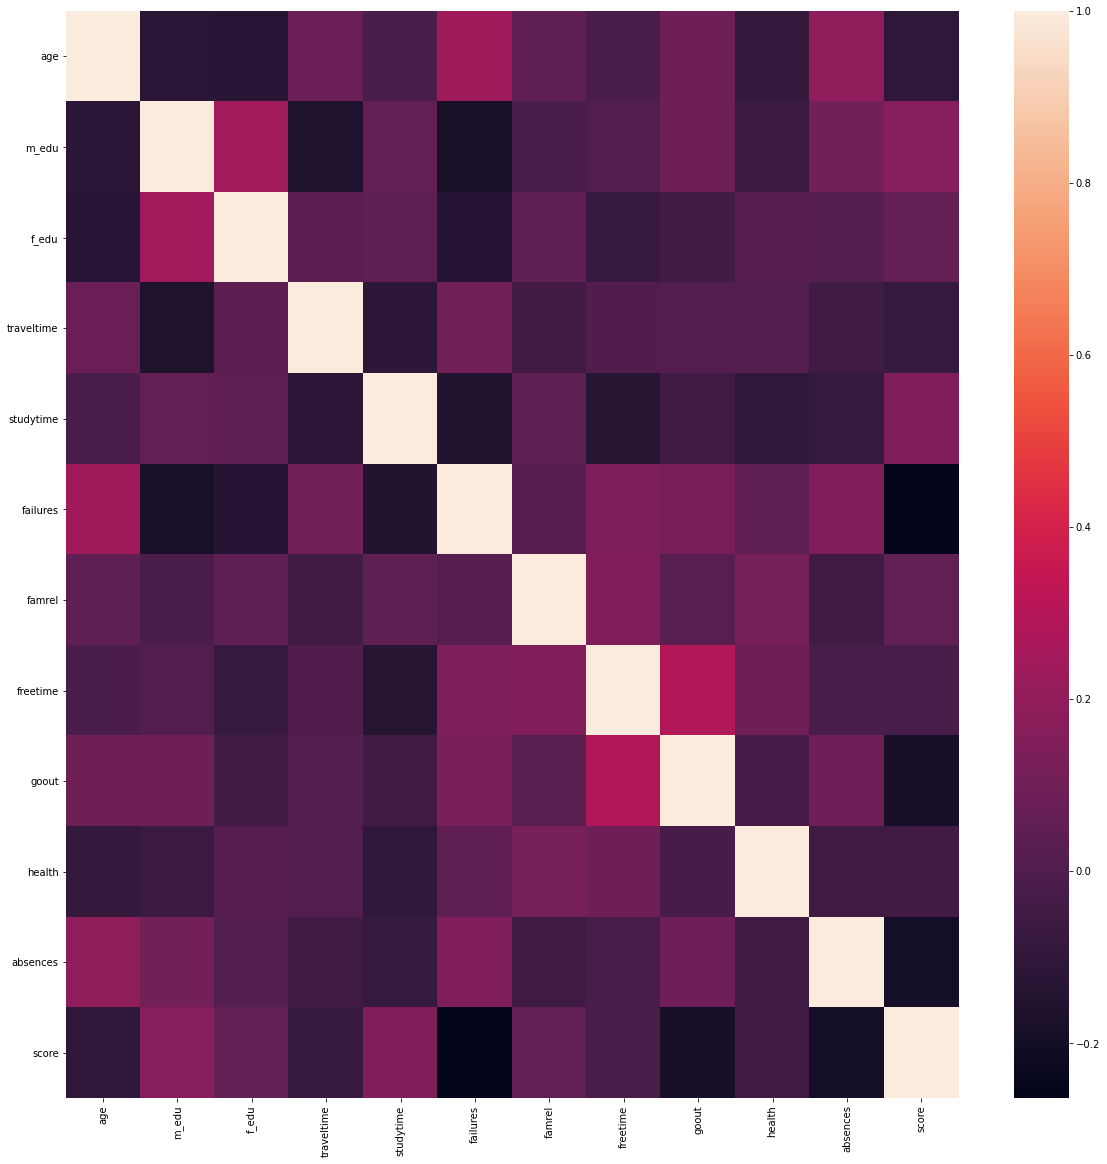

In [93]:
temp_corr = stud.corr()
sns.heatmap(temp_corr)
plt.gcf().set_size_inches(20, 20)

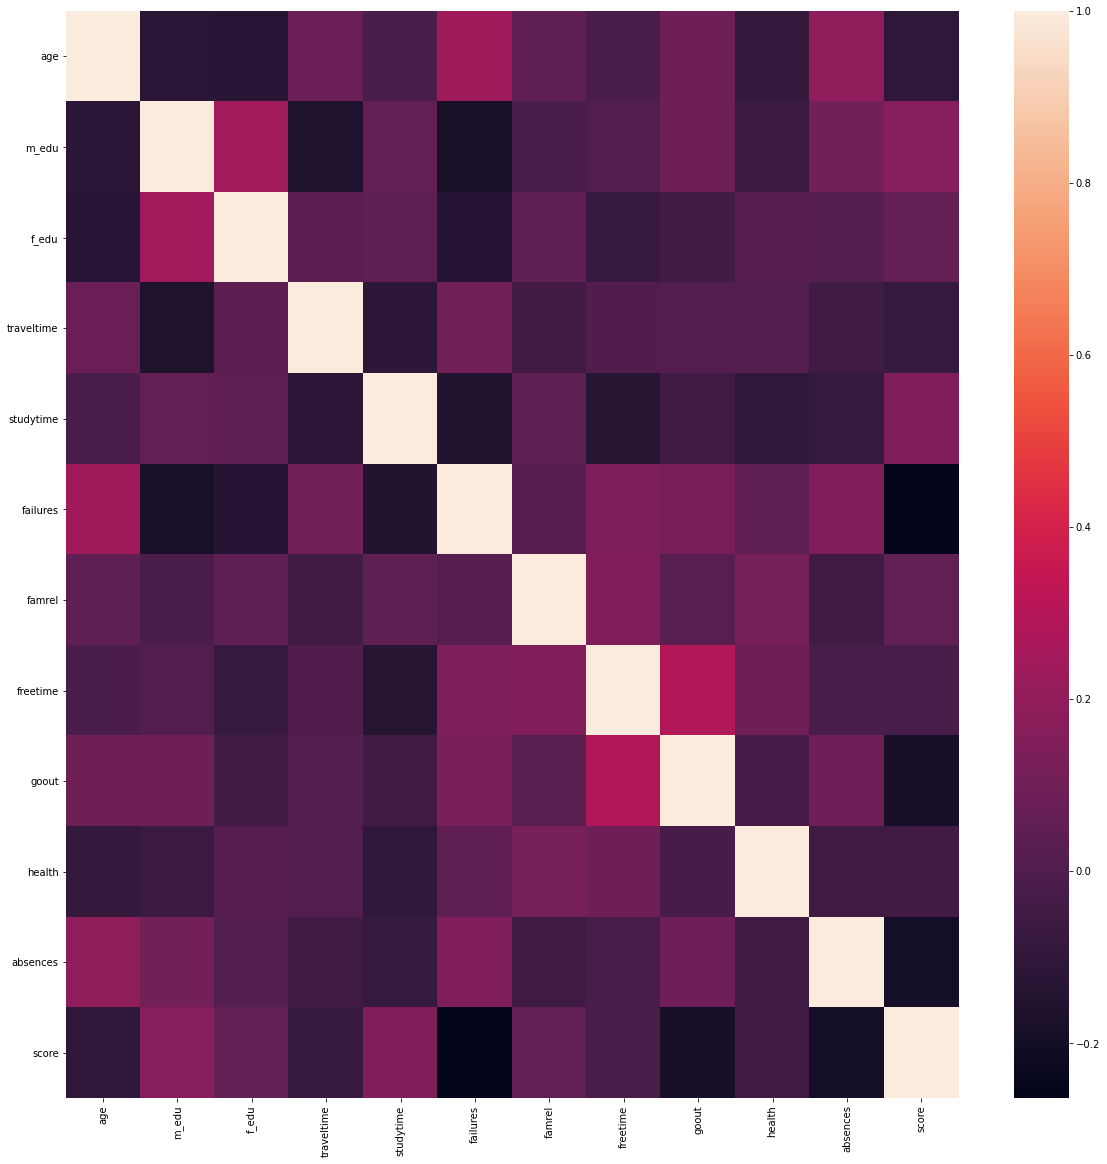

In [96]:
df_corr = df.corr()
sns.heatmap(df_corr)
plt.gcf().set_size_inches(20, 20)

In [94]:
# кроме как на главной диагонали белых зон нет, лишние данные были удалены правильно

1. Какова была ваша роль в команде?
   важная
2. Какой частью своей работы вы остались особенно довольны?
   финальным результатом
3. Что не получилось сделать так, как хотелось? Над чем ещё стоит поработать?
   стоило бы тщательнее проанализировать выбросы, было ещё несколько строк которые я мог удалить/добавить, делать не стал
   из-за не большой значимости на конечный результат
4. Что интересного и полезного вы узнали в этом модуле?
   все
5. Что является вашим главным результатом при прохождении этого проекта?
   осознание происходящего
6. Какие навыки вы уже можете применить в текущей деятельности?
   что такое текущая деятельность?
7. Планируете ли вы дополнительно изучать материалы по теме проекта?
   да